In [1]:
import numpy as np
import matplotlib.pyplot as pl
import time

In [3]:
# complex number in Python
a = 5.4 + 1j*3
print(a)
b = 1j*3
print(b)

(5.4+3j)
3j


In [4]:
print(np.real(a))
print(np.imag(a))
print(a.real)
print(a.imag)

5.4
3.0
5.4
3.0


In [9]:
c = 4*np.exp(1j*np.pi/4)
print(c)

(2.8284271247461903+2.82842712474619j)


In [10]:
a = 2 +1j*2
print(a)
print(abs(a))
print(np.arctan2(a.imag,a.real)*180/np.pi)

(2+2j)
2.8284271247461903
45.0


In [18]:
d = np.abs(a)*np.exp( 1j*np.arctan2(np.imag(a),np.real(a)))
print(a)
print(d)

(5+3j)
(5+3.0000000000000004j)


(-1.1044189906651052,
 1.1049247138411955,
 -1.1048109173732483,
 1.1048109173732483)

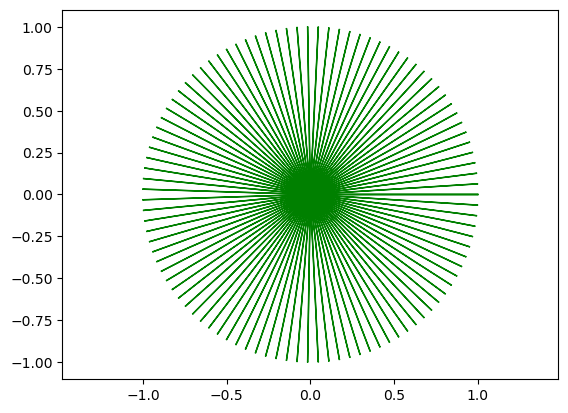

In [33]:
f = 2
w = 2*np.pi*f

t = np.linspace(0,1,100)

e = np.exp(1j*w*t)

pl.figure()
for i in range(len(t)):
    pl.arrow(0,0,e[i].real,e[i].imag,width=0.001,color='g')
pl.axis('equal')

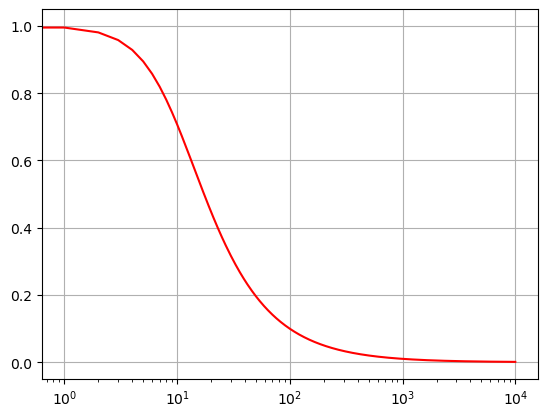

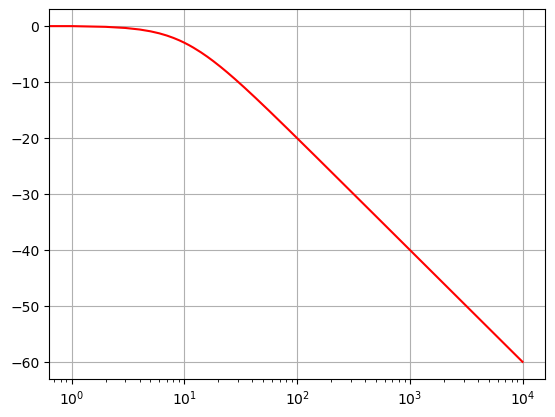

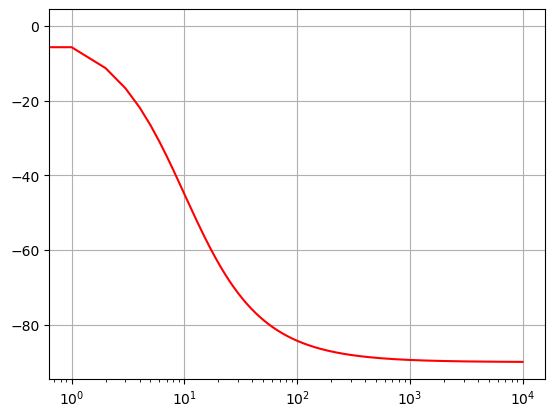

In [35]:
# set the omega range
w = np.arange(0,10000,1)
# evaluate the function H(w)
H = 1 / (1+1j*0.1*w)
Hamp = abs(H) # amplitude of H
HampdB = 20*np.log10(Hamp) # amplitude of H in dB
Hphase = np.arctan2(H.imag,H.real)*180/np.pi # phase of H, in degree

pl.semilogx(w,Hamp,'r')
pl.grid()
pl.show()
pl.semilogx(w,HampdB,'r')
pl.grid()
pl.show()
pl.semilogx(w,Hphase,'r')
pl.grid()
pl.show()

In [36]:
# Discrete Fourier Transform
def DFT(yn):
    # y: values of the function, in time domain
    N = len(yn)
    w = 2*np.pi/N
    FTk = np.zeros(N,dtype=complex)
    for k in range(0,N):
        for n in range(0,N):
            FTk[k] += np.exp(-1j*k*w*n)*yn[n]
    return FTk

201


/var/folders/5y/223jrsxj0r30h3b7kgvjdggr0000gp/T/ipykernel_71025/1388955036.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  FTk[k] += np.exp(-1j*k*w*n)*yn[n]


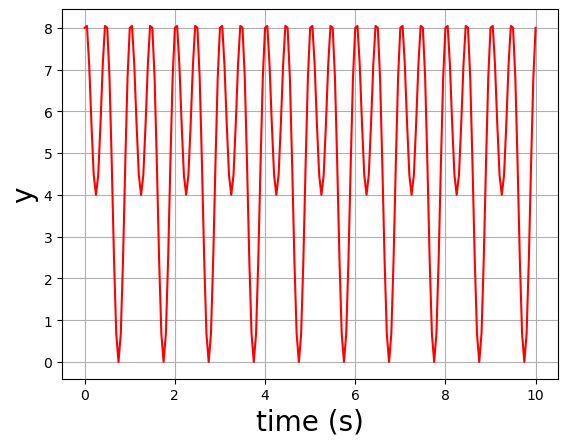

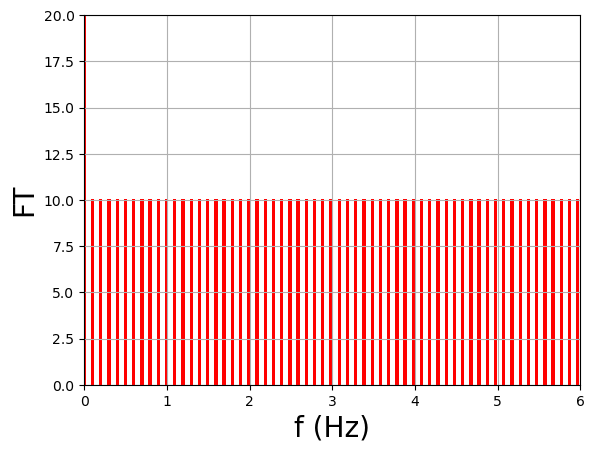

In [62]:
dt = 0.05
tend = 10

t = np.arange(0,tend+dt,dt)
N = len(t)  # number of discrete points available
print(N)
# build the frequency domain axis
df = 1/(N*dt) # frequency step
f = np.arange(0,1/dt,df)

yn = 5 + 2*np.cos(2*np.pi*t-np.pi/2) + 3*np.cos(4*np.pi*t)

FTk = DFT(f)


pl.plot(t,yn,color='r')
pl.grid()
pl.xlabel('time (s)',fontsize=20)
pl.ylabel('y',fontsize=20)
pl.show()

pl.bar(f[:int(N/2)],abs(FTk[:int(N/2)]),width=0.04,color='b')
pl.bar(f,abs(FTk),width=0.04,color='r') 
pl.axis([0,6,0,20])
pl.grid()
pl.xlabel('f (Hz)',fontsize=20)
pl.ylabel('FT',fontsize=20)
pl.show()